In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [67]:
df1=pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [68]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [69]:
df1.shape

(13320, 9)

In [70]:
#Drop unwanted columns
df2=df1.drop(['area_type','availability','society','balcony'],axis="columns")
df2.head()

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

Data Cleaning

In [71]:
#find the null values
df2.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [72]:
df3=df2.dropna()

In [73]:
df3.shape

(13246, 5)

In [74]:
#Explore size column
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [75]:
df3['BHK']=df3["size"].apply(lambda x: int(x.split(" ")[0]))
df3.head()

C:\Users\USER PC\AppData\Local\Temp\ipykernel_1768\2337183764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK']=df3["size"].apply(lambda x: int(x.split(" ")[0]))


location       size total_sqft  bath   price  BHK
0  Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2               Uttarahalli      3 BHK       1440   2.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                  Kothanur      2 BHK       1200   2.0   51.00    2

In [76]:
df3.BHK.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [77]:
#Explore total_sqft column
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [78]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [79]:
df3[~df3["total_sqft"].apply(is_float)].head()

location   size   total_sqft  bath    price  BHK
30            Yelahanka  4 BHK  2100 - 2850   4.0  186.000    4
122              Hebbal  4 BHK  3067 - 8156   4.0  477.000    4
137  8th Phase JP Nagar  2 BHK  1042 - 1105   2.0   54.005    2
165            Sarjapur  2 BHK  1145 - 1340   2.0   43.490    2
188            KR Puram  2 BHK  1015 - 1540   2.0   56.800    2

In [80]:
def convert_range_num(x):
    tokens=x.split("-")
    if len(tokens)==2:
        return float(tokens[0])+float(tokens[1])/2
    try :
        return float(x)
    except:
        return None

In [81]:
df4=df3.copy()
df4.total_sqft=df4.total_sqft.apply(convert_range_num)
df4=df4[df4.total_sqft.notnull()]
df4.head()

location       size  total_sqft  bath   price  BHK
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2

In [82]:
df4.shape

(13200, 6)

Adding a new feature called price_per_sqft

In [83]:
df5=df4.copy()
df5["price_per_sqft"]=df5["price"]*100000/df5["total_sqft"]
df5.head()

location       size  total_sqft  bath   price  BHK  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

Applying dimensionality reduction techinques to reduce the number of location

In [84]:
len(df5.location.unique())

1298

In [85]:
df5.location

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13200, dtype: object

In [86]:
df5.location=df5["location"].apply(lambda x: x.strip())
location_stats=df5.location.value_counts(ascending=False)
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [87]:
len(location_stats)

1287

In [88]:
len(location_stats[location_stats>10])

240

In [89]:
len(location_stats[location_stats<=10])

1047

In [90]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [91]:
df5.location=df5.location.apply(lambda x: "others" if x in location_stats_less_than_10 else x)
df5.location

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316                      others
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13200, dtype: object

In [92]:
len(df5.location.unique())

241

In [93]:
df5.head()

location       size  total_sqft  bath   price  BHK  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

<h4 style="color:red">OUTLIER Removal Based on Business Logic</h4>

**After discusion with HR its clear that  minimum threshold per bhk to be 300 sqft.so we have to remove the data out of this range**

In [94]:
df5[df5.total_sqft/df5.BHK<300].head()

location       size  total_sqft  bath  price  BHK  \
9                others  6 Bedroom      1020.0   6.0  370.0    6   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
58        Murugeshpalya  6 Bedroom      1407.0   4.0  150.0    6   
68  Devarachikkanahalli  8 Bedroom      1350.0   7.0   85.0    8   
70               others  3 Bedroom       500.0   3.0  100.0    3   

    price_per_sqft  
9     36274.509804  
45    33333.333333  
58    10660.980810  
68     6296.296296  
70    20000.000000

In [95]:
df6=df5[~(df5.total_sqft/df5.BHK<300)]

In [96]:
df6.shape

(12456, 7)

<h4 style='color:red'>OUTLIER Removal Using Standard Deviation and Mean</h4>

In [97]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6290.299983
std        4175.619211
min         267.829813
25%        4186.725844
50%        5281.690141
75%        6904.652015
max      176470.588235
Name: price_per_sqft, dtype: float64

**Here we find that min price per sqft is 267 rs/sqft whereas max is 176470, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation**

In [98]:
def remove_oulers_perloc(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby("location"):
        m=np.mean(subdf.price_per_sqft)
        sd=np.std(subdf.price_per_sqft)
        df_reduced=subdf[(subdf.price_per_sqft>(m-sd)) & (subdf.price_per_sqft<=(m+sd))]
        df_out=pd.concat([df_out,df_reduced],ignore_index=True)
    return df_out
df7=remove_oulers_perloc(df6)
df7.head()

location   size  total_sqft  bath  price  BHK  price_per_sqft
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4    15017.543860
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3    11901.840491
2  1st Block Jayanagar  3 BHK      1875.0   2.0  235.0    3    12533.333333
3  1st Block Jayanagar  3 BHK      1200.0   2.0  130.0    3    10833.333333
4  1st Block Jayanagar  2 BHK      1235.0   2.0  148.0    2    11983.805668

In [99]:
df7.shape

(10232, 7)

Text(0, 0.5, 'Count')

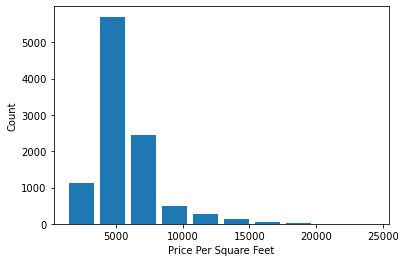

In [100]:
import matplotlib
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

**Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like using scatter diagram**

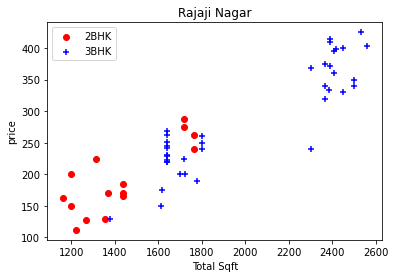

In [101]:
def scatter_plot(df,location):
    bhk2=df[(df.location==location) & (df.BHK==2)]
    bhk3=df[(df.location==location) & (df.BHK==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color="red",label="2BHK")
    plt.scatter(bhk3.total_sqft,bhk3.price,marker="+",color="blue",label="3BHK")
    plt.xlabel("Total Sqft")
    plt.ylabel("price")
    plt.title(location)
    plt.legend()
scatter_plot(df7,"Rajaji Nagar")

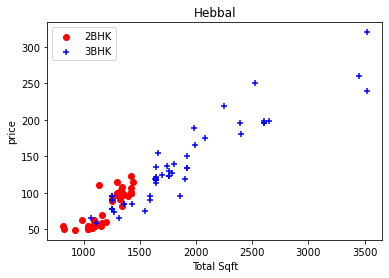

In [102]:
scatter_plot(df7,"Hebbal")

**We should also remove properties where for same location, the price of higher bedroom apartment is less than lower bedroom apartment (with same square ft area).** **Now we can remove those higher BHK apartments whose price_per_sqft is less than mean price_per_sqft of lower BHK apartment**

In [103]:
def remove_bhk_outlier(df):
    excluded_indices=np.array([])
    for location, location_df in df.groupby("location"):
        global bhk_stats
        bhk_stats={}
        for bhk, bhkdf in location_df.groupby("BHK"):
            bhk_stats[bhk]={"mean":np.mean(bhkdf.price_per_sqft),
                            "sd":np.std(bhkdf.price_per_sqft),
                            "count":bhkdf.shape[0]
                           }
        for bhk,bhkdf in location_df.groupby("BHK"):
            stats=bhk_stats.get(bhk-1)
            if stats and stats["count"]>5:
                excluded_indices=np.append(excluded_indices,bhkdf[bhkdf.price_per_sqft<(stats["mean"])].index.values)
    return df.drop(excluded_indices,axis="index")
df8=remove_bhk_outlier(df7)
df8.shape

(7313, 7)

In [104]:
bhk_stats

{1: {'mean': 5354.19341057612, 'sd': 2444.2062249805417, 'count': 133},
 2: {'mean': 5294.561668049487, 'sd': 1980.2027996343368, 'count': 985},
 3: {'mean': 6302.572280695051, 'sd': 2552.361548070696, 'count': 859},
 4: {'mean': 8308.58957601763, 'sd': 2894.058473870979, 'count': 224},
 5: {'mean': 7189.330916894648, 'sd': 3343.9378691329457, 'count': 42},
 6: {'mean': 6975.562368913401, 'sd': 3043.3045406755605, 'count': 34},
 7: {'mean': 4416.04514952076, 'sd': 1880.8047469934816, 'count': 12},
 8: {'mean': 5384.347002204145, 'sd': 1946.6298824910634, 'count': 7},
 9: {'mean': 5530.842391304348, 'sd': 3234.230886145459, 'count': 4},
 10: {'mean': 9005.681818181818, 'sd': 4630.681818181818, 'count': 2},
 11: {'mean': 4850.0, 'sd': 2350.0, 'count': 2},
 13: {'mean': 5069.124423963133, 'sd': 0.0, 'count': 1},
 16: {'mean': 5500.0, 'sd': 0.0, 'count': 1}}

**Scatter plot after removal of bhk outlier**

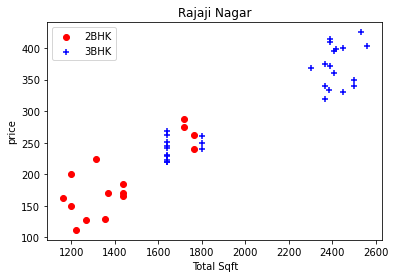

In [105]:
scatter_plot(df8,"Rajaji Nagar")

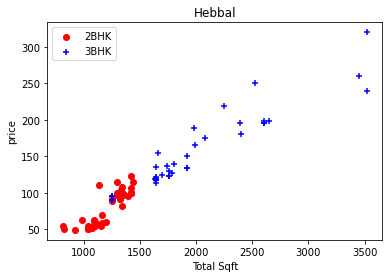

In [106]:
scatter_plot(df8,"Hebbal")

<h4 style='color:red'>OUTLIER Removal Using Bathrooms Feature</h4>

In [107]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'count')

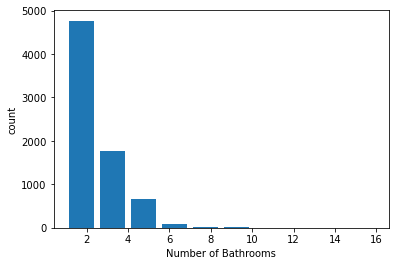

In [108]:
plt.hist(df8.bath,rwidth=.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("count")

In [109]:
df8[df8.bath>10]

location    size  total_sqft  bath  price  BHK  price_per_sqft
5273  Neeladri Nagar  10 BHK      4000.0  12.0  160.0   10     4000.000000
8473          others  10 BHK     12000.0  12.0  525.0   10     4375.000000
8562          others  16 BHK     10000.0  16.0  550.0   16     5500.000000
9296          others  11 BHK      6000.0  12.0  150.0   11     2500.000000
9627          others  13 BHK      5425.0  13.0  275.0   13     5069.124424

**It is unusual to have 2 more bathrooms than number of bedrooms in a home.  So we have to remove such columns**

In [110]:
df9 = df8[df8.bath<df8.BHK+2]
df9.head()

location   size  total_sqft  bath  price  BHK  price_per_sqft
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4    15017.543860
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3    11901.840491
2  1st Block Jayanagar  3 BHK      1875.0   2.0  235.0    3    12533.333333
3  1st Block Jayanagar  3 BHK      1200.0   2.0  130.0    3    10833.333333
4  1st Block Jayanagar  2 BHK      1235.0   2.0  148.0    2    11983.805668

In [111]:
df9.shape

(7239, 7)

In [112]:
df10=df9.drop(["size","price_per_sqft"],axis="columns")
df10.head(3)

location  total_sqft  bath  price  BHK
0  1st Block Jayanagar      2850.0   4.0  428.0    4
1  1st Block Jayanagar      1630.0   3.0  194.0    3
2  1st Block Jayanagar      1875.0   2.0  235.0    3

<h4 style='color:red'>Use ONE HOT ENCODING For Location</h4>

In [113]:
dummies=pd.get_dummies(df10.location)
dummies.head(2)

1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                    1                   0                          0   
1                    1                   0                          0   

   2nd Stage Nagarbhavi  5th Block Hbr Layout  5th Phase JP Nagar  \
0                     0                     0                   0   
1                     0                     0                   0   

   6th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
0                   0                   0                   0   
1                   0                   0                   0   

   9th Phase JP Nagar  ...  Vishveshwarya Layout  Vishwapriya Layout  \
0                   0  ...                     0                   0   
1                   0  ...                     0                   0   

   Vittasandra  Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  \
0            0           0               0          0                   0   
1            0           0               0          0                   0   

   Yelenahalli  Yeshwanthpur  others  
0            0             0       0  
1            0             0       0  

[2 rows x 241 columns]

In [114]:
df11=pd.concat([df10,dummies.drop("others",axis='columns')],axis="columns")
df11.head()

location  total_sqft  bath  price  BHK  1st Block Jayanagar  \
0  1st Block Jayanagar      2850.0   4.0  428.0    4                    1   
1  1st Block Jayanagar      1630.0   3.0  194.0    3                    1   
2  1st Block Jayanagar      1875.0   2.0  235.0    3                    1   
3  1st Block Jayanagar      1200.0   2.0  130.0    3                    1   
4  1st Block Jayanagar      1235.0   2.0  148.0    2                    1   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
0                   0                          0                     0   
1                   0                          0                     0   
2                   0                          0                     0   
3                   0                          0                     0   
4                   0                          0                     0   

   5th Block Hbr Layout  ...  Vijayanagar  Vishveshwarya Layout  \
0                     0  ...            0                     0   
1                     0  ...            0                     0   
2                     0  ...            0                     0   
3                     0  ...            0                     0   
4                     0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   
3                   0            0           0               0          0   
4                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  
3                   0            0             0  
4                   0            0             0  

[5 rows x 245 columns]

In [115]:
df12=df11.drop("location",axis="columns")
df12.head(2)

total_sqft  bath  price  BHK  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0  428.0    4                    1                   0   
1      1630.0   3.0  194.0    3                    1                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   

   5th Phase JP Nagar  ...  Vijayanagar  Vishveshwarya Layout  \
0                   0  ...            0                     0   
1                   0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  

[2 rows x 244 columns]

<h4 style='color:red'>MODEL BUILDING</h4>

In [116]:
X=df12.drop("price",axis="columns")

In [117]:
X.shape

(7239, 243)

In [118]:
Y=df12.price

In [119]:
Y.shape

(7239,)

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [122]:
from sklearn.linear_model import LinearRegression
lnr_mdl=LinearRegression()
lnr_mdl.fit(X_train,Y_train)
lnr_mdl.score(X_test,Y_test)

0.8364534927498926

<h4 style='color:red'>Use K Fold cross validation to measure accuracy of our LinearRegression model</h4>

In [123]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.83645349, 0.81129396, 0.8829606 , 0.80581737, 0.80069758])

**We can see that in 5 iterations we got a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose**

<h4 style='color:red'>Find best model using GridSearchCV</h4>

In [124]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)

C:\Users\USER PC\anaconda3\jupyter\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\USER PC\anaconda3\jupyter\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import ma

C:\Users\USER PC\anaconda3\jupyter\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


model  best_score                                 best_params
0  linear_regression    0.843135                        {'normalize': False}
1              lasso    0.710813         {'alpha': 1, 'selection': 'random'}
2      decision_tree    0.685217  {'criterion': 'mse', 'splitter': 'random'}

**From the above result we can see that LineraRegression gives the best score. So we will select LinearRegression for model building**

In [125]:
X.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [126]:
location='1st Phase JP Nagar'
np.where(X.columns==location)[0][0]

4

<h4 style='color:red'>Test the model for few properties</h4>

In [134]:
def price_prediction(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    return lnr_mdl.predict([x])[0]

In [135]:
price_prediction('1st Phase JP Nagar',1000, 2, 2)

C:\Users\USER PC\anaconda3\jupyter\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.84699754210696

In [137]:
price_prediction('Indira Nagar',1000, 3, 3)

C:\Users\USER PC\anaconda3\jupyter\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


175.2238916667386

<h4 style='color:red'>Export the tested model to a pickle file</h4>

In [3]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lnr_mdl,f)

NameError: name 'lnr_mdl' is not defined

<h4 style='color:red'>Export location and column information to a file that will be useful later on in our prediction application</h4>

In [140]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))